In [1]:
"""
Import
"""
from matplotlib.colors import ListedColormap, BoundaryNorm, TwoSlopeNorm, LinearSegmentedColormap, LogNorm
import matplotlib.cm as cm
import matplotlib.lines as mlines
from typing import List
from tqdm.notebook import trange, tqdm
import xesmf as xe
import numpy as np
import pandas as pd
import xarray as xr
import pickle
import os
import glob
import sys
import matplotlib.patheffects as pe
from datetime import datetime, timedelta
import matplotlib.patches as patches
from matplotlib.path import Path
import matplotlib.pyplot as plt
import numpy.ma as ma
import cartopy.crs as ccrs  # Import cartopy ccrs
import cartopy.feature as cfeature  # Import cartopy common features
from matplotlib import animation
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
import scipy.stats
import math
import time as time_mod
import pickle as pkl
sys.path.insert(0, "/home/chalifour/code/master")
from fct_script.func_py import get_proj_extent
import fct_script.rpn_funcs_chris as rpn_chris
from fct_script.get_domain import get_domain_info
from fct_script.func_py import get_colormap_precip, categorical_cmap
from matplotlib.patches import Patch
from Annual_analysis.fct_diff_map import plot_map_diffPR_2reffsim, plot_map_diffTT_2reffsim,\
    plot_map_diffphase_reffsim,biais
import scipy as sp
# from func_py import get_proj_extent

try:
    import rpnpy.librmn.all as rmn  # Module to read RPN files
    from rotated_lat_lon import RotatedLatLon  # Module to project field on native grid (created by Sasha Huziy)
except ImportError as err:
    print(f"RPNPY can only be use on the server. It can't be use on a personal computer."
          f"\nError throw :{err}")

In [2]:


begin_1,end_1 = '2020-10','2021-05'
begin_2,end_2 = '2021-10','2022-05'
begin_date_1, end_date_1 = datetime.strptime(begin_1, '%Y-%m'), datetime.strptime(end_1, '%Y-%m')
begin_date_2, end_date_2 = datetime.strptime(begin_2, '%Y-%m'), datetime.strptime(end_2, '%Y-%m')
#

begin_t,end_t = '2020-10','2022-05'
# timerange_month = pd.date_range(begin, end, freq='MS')
#
# timerange_day = pd.date_range(begin, end, freq='D')

# season = ['ON', 'DJF', 'MAM']
# season_dict = {'ON': {'month': [10, 11], 'year': begin_date.year},
#                'DJF': {'month': [12, 1, 2], 'year': begin_date.year},
#                'MAM': {'month': [3, 4, 5], 'year': end_date.year}}
list_phase = ['LIQUID', 'FR', 'MIXFR', 'MIX', 'SOLID', 'PR']
phase_list = ['frac_liquide', 'frac_FZ','frac_mix_fr', 'frac_mix','frac_solide','PR']

In [3]:
lonlat_path = '/upslope/chalifour/code_fig_bassin_domaine/Disdrometres_coordonnées.csv'
df_disdro = pd.read_csv(lonlat_path, header=0)
df_disdro.set_index('Name', inplace=True)
data_path = sorted(glob.glob(fr"/upslope/chalifour/projet_maitrise/"))[0]
HQ_compiled_savepath = os.path.join(data_path, r"data_format-master/Data.nosync/station_gmon/Full_datasets")
file_1h = glob.glob(HQ_compiled_savepath + '/dataset_1h.csv')

path_save_df = '/upslope/chalifour/projet_maitrise/dataframe_obs_formated'

# Obs


In [4]:
path_save_df = '/upslope/chalifour/projet_maitrise/dataframe_obs_formated'
# Obs

dataframe_1h_obs = pd.read_csv(path_save_df + f'/dataframe_1h_stat_formated_2year.csv',
                               parse_dates=['date'])

dataframe_1h_obs.set_index('date', inplace=True)

dataframe_11km_obs = pd.read_csv(path_save_df + f'/dataframe_11kmP3_stat_formated_2year.csv',
                                 parse_dates=['time'])
dataframe_11km_obs.set_index('time', inplace=True)
dataframe_2p5km_obs = pd.read_csv(
    path_save_df + f'/dataframe_2p5kmP3_stat_formated_2year.csv', parse_dates=['time'])
dataframe_2p5km_obs.set_index('time', inplace=True)
# dataframe_era5_obs = pd.read_csv(path_save_df + f'/dataframe_ERA5_stat_formated_{begin_date.year}_{end_date.year}.csv',
#                                  parse_dates=['time'])
# dataframe_era5_obs.set_index('time', inplace=True)
# dict = {'filename': 'filename', 'TT': 'TT', 'LIQUID': 'frac_liquide', 'FR': 'frac_FZ', 'MIXFR': 'frac_mix_fr',
#         'MIX': 'frac_mix', 'SOLID': 'frac_solide'}
# call rename () method
# dataframe_era5_obs.rename(columns=dict,
#                           inplace=True)
# list_capa=[]
# for stat,subdf in dataframe_1h_obs_capa.groupby('filename'):

   # list_capa.append(subdf.loc[begin:end])
# dataframe_1h_obs_capa = pd.concat(list_capa)

dict_obs = {'frac_liquid': 'frac_liquide'}
# call rename () method
dataframe_1h_obs.rename(columns=dict_obs,
                        inplace=True)

# uqam
dataframe_1h_uqam = pd.read_csv(path_save_df + f'/dataframe_uqam_formated_2year.csv',
                                parse_dates=['date'])
dataframe_1h_uqam.set_index('date', inplace=True)
dataframe_1h_uqam.rename(columns=dict_obs,
                         inplace=True)

dataframe_11km_uqammomo = pd.read_csv(
    path_save_df + f'/dataframe_11kmP3_Umomo_stat_formated_2year.csv', parse_dates=['time'])
dataframe_11km_uqammomo.set_index('time', inplace=True)
dataframe_2p5km_uqammomo = pd.read_csv(
    path_save_df + f'/dataframe_2p5kmP3_Umomo_stat_formated_2year.csv', parse_dates=['time'])
dataframe_2p5km_uqammomo.set_index('time', inplace=True)
# dataframe_era5_uqammomo = pd.read_csv(
#     path_save_df + f'/dataframe_ERA5_uqammomo_formated_{begin_date.year}_{end_date.year}.csv', parse_dates=['time'])
# dataframe_era5_uqammomo.set_index('time', inplace=True)
#
# dataframe_era5_uqammomo.rename(columns=dict,
#                                inplace=True)

dataframe_11kmuqam = dataframe_11km_uqammomo.loc[dataframe_11km_uqammomo['filename'] == 'UQAM_PK']
dataframe_2p5kmuqam = dataframe_2p5km_uqammomo.loc[dataframe_2p5km_uqammomo['filename'] == 'UQAM_PK']
# dataframe_era5uqam = dataframe_era5_uqammomo.loc[dataframe_era5_uqammomo['filename'] == 'UQAM_PK']

# dataframe_capauqam = dataframe_capauqam.loc[begin:end]
# momo

dataframe_1h_momo = pd.read_csv(path_save_df + f'/dataframe_momo_formated_2year.csv',
                                parse_dates=['date'])
dataframe_1h_momo.set_index('date', inplace=True)
dataframe_1h_momo.rename(columns=dict_obs,
                         inplace=True)
dataframe_1h_momo['precip_inst_pluvio'] = dataframe_1h_momo['precip_inst_geonor']


dataframe_11kmmomo = dataframe_11km_uqammomo.loc[dataframe_11km_uqammomo['filename'] == 'NEIGE']
dataframe_2p5kmmomo = dataframe_2p5km_uqammomo.loc[dataframe_2p5km_uqammomo['filename'] == 'NEIGE']

dataframe_1h =  pd.concat([dataframe_1h_obs,dataframe_1h_uqam,dataframe_1h_momo])
dataframe_11km =  pd.concat([dataframe_11km_obs,dataframe_11kmuqam,dataframe_11kmmomo])
dataframe_2p5km =  pd.concat([dataframe_2p5km_obs,dataframe_2p5kmuqam,dataframe_2p5kmmomo])
print(dataframe_1h)



                     EEN_K  humidite_air  neige_sol  temp_moy  temp_max  \
date                                                                      
2020-10-01 00:00:00    NaN           NaN        NaN       NaN       NaN   
2020-10-01 01:00:00    NaN     93.987500       0.03  5.548500   5.83050   
2020-10-01 02:00:00    NaN     94.262500       0.06  5.691500   6.07775   
2020-10-01 03:00:00    NaN     93.900000       0.09  6.139375   6.41750   
2020-10-01 04:00:00    NaN     93.175000       0.04  6.438000   6.79325   
...                    ...           ...        ...       ...       ...   
2022-04-30 19:00:00    NaN     39.307833        NaN  9.668500  10.39000   
2022-04-30 20:00:00    NaN     37.907333        NaN  9.812167  10.35000   
2022-04-30 21:00:00    NaN     37.398167        NaN  9.855333  10.10000   
2022-04-30 22:00:00    NaN     37.534333        NaN  9.784833  10.44000   
2022-04-30 23:00:00    NaN     40.905333        NaN  9.017400   9.52000   

                     tem

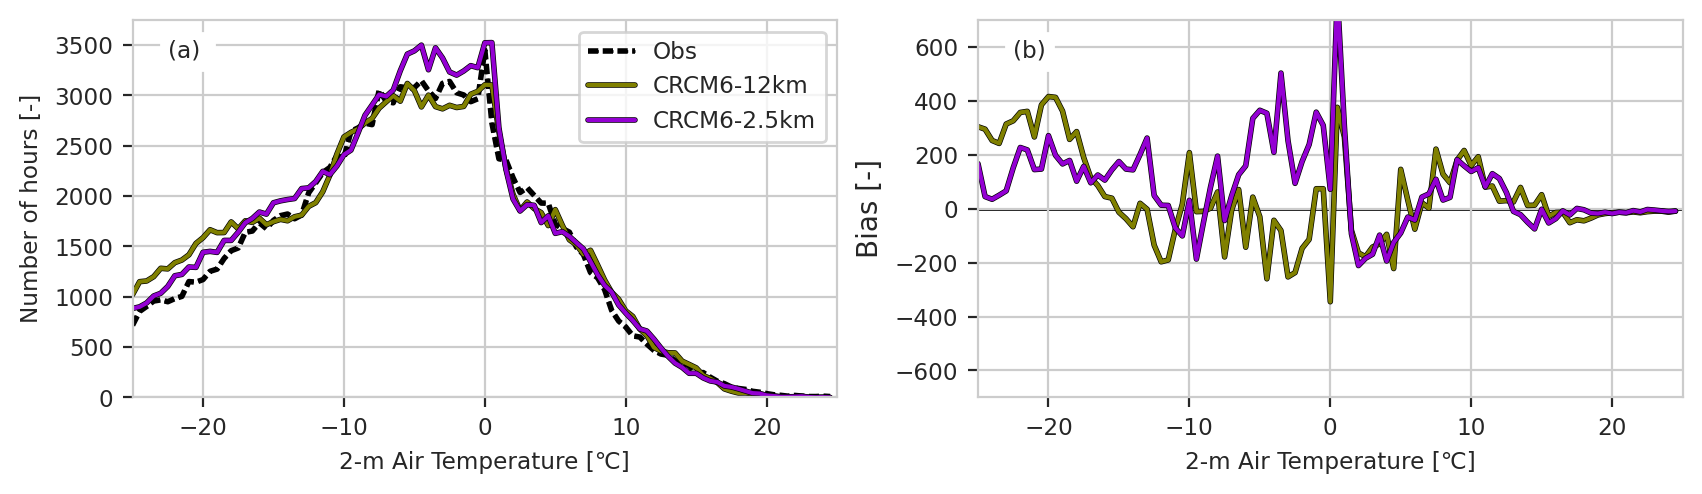

In [5]:
#temp
list_threshold = np.arange(-25,25.5,0.5)
list_temp_obs = []
list_temp_11km = []
list_temp_2p5km = []
for idx in range(len(list_threshold)-1):
    thresh_tt = (dataframe_1h['temp_moy']>=list_threshold[idx])&(dataframe_1h['temp_moy']<list_threshold[idx+1])


    list_temp_obs.append(np.sum(thresh_tt))


    thresh_tt_11km = (dataframe_11km['TT']>=list_threshold[idx])&(dataframe_11km['TT']<list_threshold[idx+1])
    list_temp_11km.append(np.sum(thresh_tt_11km))

    thresh_tt_2p5km = (dataframe_2p5km['TT']>=list_threshold[idx])&(dataframe_2p5km['TT']<list_threshold[idx+1])

    list_temp_2p5km.append(np.sum(thresh_tt_2p5km))


fig = plt.figure(facecolor='white', figsize=(10, 2.5), dpi=200)
spec = fig.add_gridspec(ncols=2, nrows=1)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[0, 1])
ax0.plot(list_threshold[:-1],np.array(list_temp_obs),label='Obs',color='k',linestyle='--',linewidth=1,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])
ax0.plot(list_threshold[:-1],np.array(list_temp_11km),label='CRCM6-12km',color='olive',path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])
ax0.plot(list_threshold[:-1],np.array(list_temp_2p5km),label='CRCM6-2.5km',color='darkviolet',path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])


ax1.plot(list_threshold[:-1],np.array(list_temp_11km)-np.array(list_temp_obs),label='CRCM6-12km',color='olive',path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])
ax1.plot(list_threshold[:-1],np.array(list_temp_2p5km)-np.array(list_temp_obs),label='CRCM6-2.5km',color='darkviolet',path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])




for ax in [ax0,ax1]:
    ax.set_xlim([list_threshold[0],list_threshold[-1]])
    ax.tick_params(which="both",left=True,bottom=True,labelbottom=True)
    ax.grid(True,zorder=-9999,)
    ax.xaxis.set_tick_params(labelsize='small')
    ax.yaxis.set_tick_params(labelsize='small')

ax0.set_ylabel('Number of hours [-]',fontsize='small')
ax0.set_xlabel('2-m Air Temperature [\u2103]',fontsize='small')
ax1.set_xlabel('2-m Air Temperature [\u2103]',fontsize='small')
ax1.hlines(0,xmin = list_threshold[0], xmax = list_threshold[-1],colors='k',linewidth=1,zorder = -999)
bbox = dict(boxstyle="square", fc="w",ec='w')
ax0.legend(fontsize='small',ncol=1, bbox_to_anchor=(1.0, 1))
ax1.set_ylabel('Bias [-]')
ax1.set_ylim(-700,700)
ax0.set_ylim(0,3750)
ax0.annotate(f'(a) ', xy=(0.05, 0.9), bbox=bbox, xycoords='axes fraction',fontsize='small')
ax1.annotate(f'(b)', xy=(0.05, 0.9), bbox=bbox, xycoords='axes fraction',fontsize='small')


image_savepath = fr"/upslope/chalifour/projet_maitrise/fig_v2/fig_dist_temp"
fig.savefig(image_savepath+".png", format='png', bbox_inches='tight')


plt.show()
plt.close(fig)

T_50 Obs  2.0
T_50 12 km  0.5
T_50 2.5 km  0.5


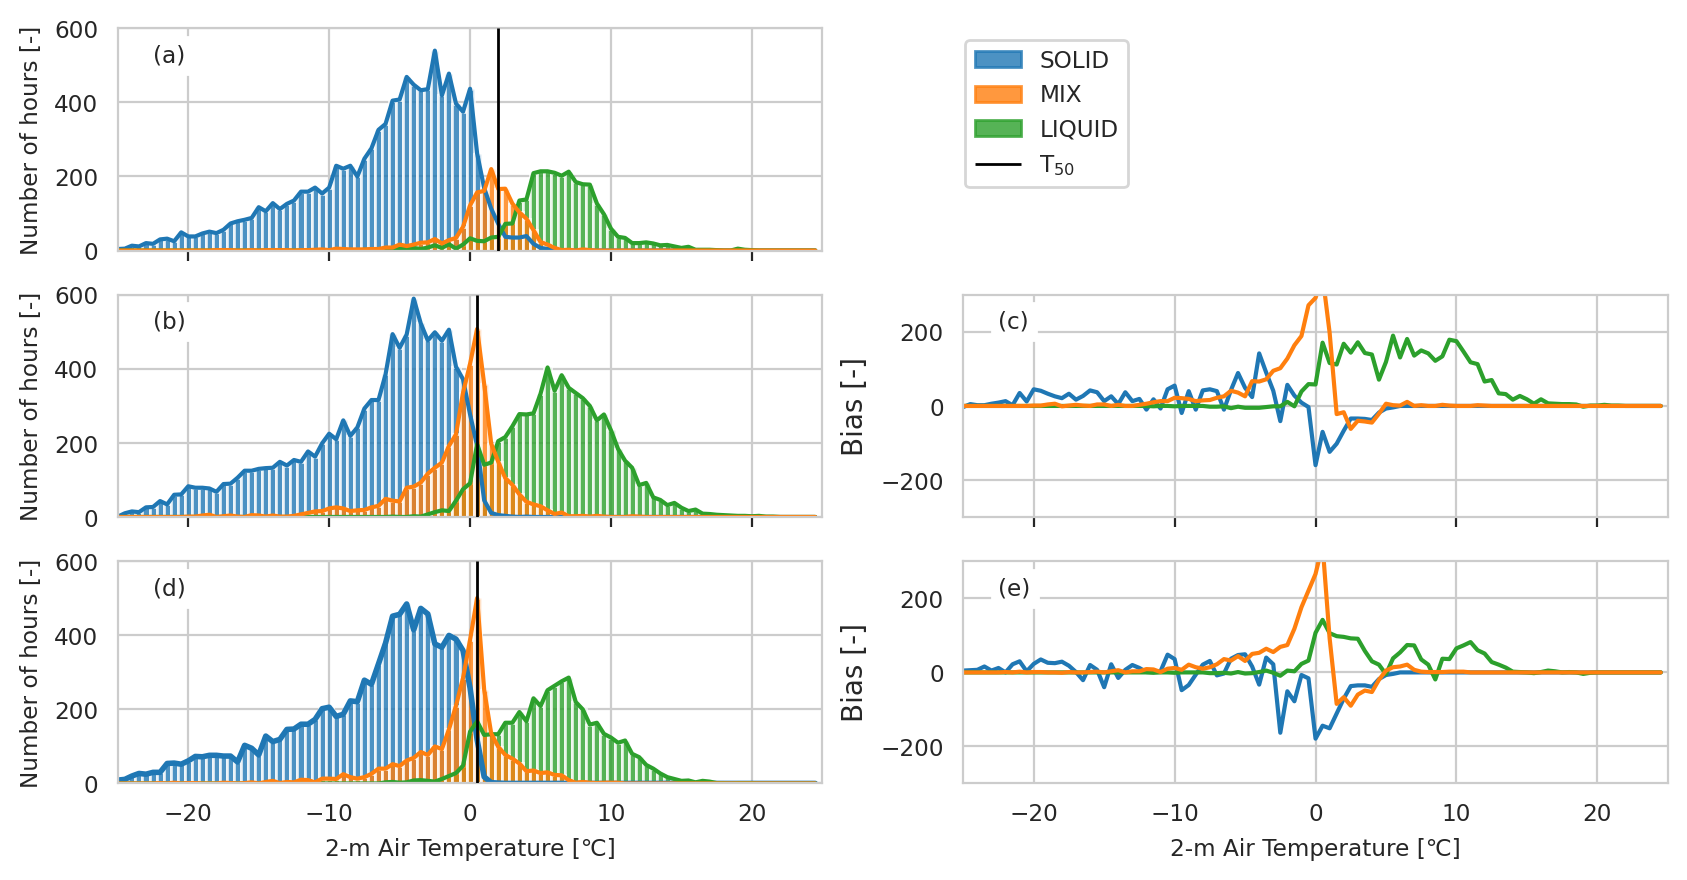

In [6]:
# Temperature du thermometre normal
width = 0.5
fig = plt.figure(facecolor='white', figsize=(10, 5), dpi=200)
spec = fig.add_gridspec(ncols=2, nrows=3)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])
ax2 = fig.add_subplot(spec[2, 0])

ax3 = fig.add_subplot(spec[1, 1])
ax4 = fig.add_subplot(spec[2, 1])
list_threshold = np.arange(-25,25.5,0.5)
list_fliquid_obs = []
list_ffr_obs = []
list_fsolid_obs = []
list_fmix_obs = []
list_fmixfr_obs = []
ymax = 600
for ax in [ax0,ax1,ax2,ax3,ax4]:
    ax.set_axisbelow(True)
    ax.grid(True,zorder=-9999,)
    ax.xaxis.set_tick_params(labelsize='small')
    ax.yaxis.set_tick_params(labelsize='small')

for idx in range(len(list_threshold)-1):
    thresh_tt = (dataframe_1h['temp_moy']>=list_threshold[idx])&(dataframe_1h['temp_moy']<list_threshold[idx+1])


    df_t = dataframe_1h.loc[thresh_tt]


    list_fsolid_obs.append(np.sum((df_t['frac_solide'])/(df_t['frac_solide'])))
    list_fliquid_obs.append(np.sum((df_t['frac_liquide'])/(df_t['frac_liquide'])))
    list_ffr_obs.append(np.sum((df_t['frac_FZ'])/(df_t['frac_FZ'])))
    list_fmix_obs.append(np.sum((df_t['frac_mix'])/(df_t['frac_mix'])))
    list_fmixfr_obs.append(np.sum((df_t['frac_mix_fr'])/(df_t['frac_mix_fr'])))
    #
    # list_fsolid.append(np.sum((df_t['precip_inst_pluvio']*df_t['f_solid'])))
    # list_fliquid.append(np.sum((df_t['precip_inst_pluvio']*df_t['f_liquid'])))
    # list_fmix.append(np.sum(df_mixte['precip_inst_pluvio']))

array_f_solid = np.array(list_fsolid_obs)[(np.array(list_fliquid_obs)>10) & (np.array(list_fsolid_obs)>10)]
array_f_liquid = np.array(list_fliquid_obs)[(np.array(list_fliquid_obs)>10) & (np.array(list_fsolid_obs)>10)]
thresh = list_threshold[:-1][(np.array(list_fliquid_obs)>10) & (np.array(list_fsolid_obs)>10)]

idx_min = np.argmin((abs(array_f_solid-array_f_liquid)))
t_50_obs = thresh[idx_min]
print('T_50 Obs ', thresh[idx_min])

ax0.bar(list_threshold[:-1],list_fsolid_obs,facecolor='tab:blue',width=width,alpha=0.8,ec="w")
ax0.bar(list_threshold[:-1],np.array(list_fliquid_obs)+np.array(list_ffr_obs),facecolor='tab:green',width=width,alpha=0.8,ec="w")
ax0.bar(list_threshold[:-1],np.array(list_fmix_obs)+np.array(list_fmixfr_obs),facecolor='tab:orange',width=width,alpha=0.8,ec="w")
# ax0.bar(list_threshold[:-1],list_fmixfr_obs,facecolor='tab:purple',width=width,alpha=0.8,ec="w")
# ax0.bar(list_threshold[:-1],list_ffr_obs,facecolor='tab:red',width=width,alpha=0.8,ec="w")

ax0.plot(list_threshold[:-1],list_fsolid_obs,c='tab:blue',linewidth=1.5)
# ax0.fill_between(list_threshold[:-1],0,list_fsolid_obs, color='tab:blue',alpha=0.8)
ax0.plot(list_threshold[:-1],np.array(list_fliquid_obs)+np.array(list_ffr_obs),c='tab:green',linewidth=1.5)

# ax0.fill_between(list_threshold[:-1],0,list_fliquid_obs, color='tab:green',alpha=0.8)
ax0.plot(list_threshold[:-1],np.array(list_fmix_obs)+np.array(list_fmixfr_obs),c='tab:orange',linewidth=1.5)
# ax0.plot(list_threshold[:-1],list_fmixfr_obs,c='tab:purple',linewidth=2)
# ax0.plot(list_threshold[:-1],list_ffr_obs,c='tab:red',linewidth=2)
# ax0.fill_between(list_threshold[:-1],0,list_fmix_obs, color='tab:orange',alpha=0.8)
vline_t50 = ax0.vlines(2,ymin = 0, ymax = ymax,colors='k',linewidth=1,zorder = 999)

bbox = dict(boxstyle="square", fc="w",ec='w')
#ax0.annotate('T$_{50}$'+f' = {2.1:.1f} \u2103 ', xy=(2.1+2, 500), bbox=bbox,fontsize=8)


handle = [Patch(facecolor='tab:blue', edgecolor="tab:blue",alpha=0.8),Patch(facecolor='tab:orange', edgecolor="tab:orange",alpha=0.8),Patch(facecolor='tab:green', edgecolor="tab:green",alpha=0.8),vline_t50]
label = ['SOLID','MIX','LIQUID','T$_{50}$']

ax0.legend(handles=handle,labels=label,ncol=1,fontsize='small', bbox_to_anchor=(1.45, 1))

list_fliquid_11km = []
list_fsolid_11km = []
list_fmix_11km = []
list_fmixfr_11km = []
list_ffr_11km = []
for idx in range(len(list_threshold)-1):
    thresh_tt = (dataframe_11km['TT']>=list_threshold[idx])&(dataframe_11km['TT']<list_threshold[idx+1])


    df_t = dataframe_11km.loc[thresh_tt]


    list_fsolid_11km.append(np.sum((df_t['frac_solide'])/(df_t['frac_solide'])))
    list_fliquid_11km.append(np.sum((df_t['frac_liquide'])/(df_t['frac_liquide'])))
    list_ffr_11km.append(np.sum((df_t['frac_FZ'])/(df_t['frac_FZ'])))
    list_fmix_11km.append(np.sum((df_t['frac_mix'])/(df_t['frac_mix'])))
    list_fmixfr_11km.append(np.sum((df_t['frac_mix_fr'])/(df_t['frac_mix_fr'])))
    #
    # list_fsolid.append(np.sum((df_t['PR']*df_t['f_solid'])))
    # list_fliquid.append(np.sum((df_t['PR']*df_t['f_liquid'])))
    # list_fmix.append(np.sum(df_mixte['PR']))


array_f_solid = np.array(list_fsolid_11km)[(np.array(list_fliquid_11km)>10) & (np.array(list_fsolid_11km)>10)]
array_f_liquid = np.array(list_fliquid_11km)[(np.array(list_fliquid_11km)>10) & (np.array(list_fsolid_11km)>10)]
thresh = list_threshold[:-1][(np.array(list_fliquid_11km)>10) & (np.array(list_fsolid_11km)>10)]

idx_min = np.argmin((abs(array_f_solid-array_f_liquid)))
t_50_11km = thresh[idx_min]
print('T_50 12 km ', thresh[idx_min])
ax1.bar(list_threshold[:-1],list_fsolid_11km,facecolor='tab:blue',width=width,alpha=0.8,ec="w")
ax1.bar(list_threshold[:-1],np.array(list_fliquid_11km)+np.array(list_ffr_11km),facecolor='tab:green',width=width,alpha=0.8,ec="w")
ax1.bar(list_threshold[:-1],np.array(list_fmix_11km)+np.array(list_fmixfr_11km),facecolor='tab:orange',width=width,alpha=0.8,ec="w")

# ax1.bar(list_threshold[:-1],list_fmixfr_11km,facecolor='tab:purple',width=width,alpha=0.8,ec="w")
# ax1.bar(list_threshold[:-1],list_ffr_11km,facecolor='tab:red',width=width,alpha=0.8,ec="w")

ax1.plot(list_threshold[:-1],list_fsolid_11km,c='tab:blue',linewidth=1.5)
# ax0.fill_between(list_threshold[:-1],0,list_fsolid_obs, color='tab:blue',alpha=0.8)
ax1.plot(list_threshold[:-1],np.array(list_fliquid_11km)+np.array(list_ffr_11km),c='tab:green',linewidth=1.5)
# ax0.fill_between(list_threshold[:-1],0,list_fliquid_obs, color='tab:green',alpha=0.8)
ax1.plot(list_threshold[:-1],np.array(list_fmix_11km)+np.array(list_fmixfr_11km),c='tab:orange',linewidth=1.5)


ax3.plot(list_threshold[:-1],np.array(list_fsolid_11km)-np.array(list_fsolid_obs),c='tab:blue',linewidth=1.5)
# ax0.fill_between(list_threshold[:-1],0,list_fsolid_obs, color='tab:blue',alpha=0.8)
ax3.plot(list_threshold[:-1],(np.array(list_fliquid_11km)+np.array(list_ffr_11km))-(np.array(list_fliquid_obs)+np.array(list_ffr_obs)),c='tab:green',linewidth=1.5)
# ax0.fill_between(list_threshold[:-1],0,list_fliquid_obs, color='tab:green',alpha=0.8)
ax3.plot(list_threshold[:-1],(np.array(list_fmix_11km)+np.array(list_fmixfr_11km))-(np.array(list_fmix_obs)+np.array(list_fmixfr_obs)),c='tab:orange',linewidth=1.5)
# ax1.plot(list_threshold[:-1],list_fmixfr_11km,c='tab:purple',linewidth=2)
# ax1.plot(list_threshold[:-1],list_ffr_11km,c='tab:red',linewidth=2)
# ax1.fill_between(list_threshold[:-1],0,list_fmix_11km, color='tab:orange',alpha=0.8)
ax1.vlines(0.5,ymin = 0, ymax = ymax,colors='k',linewidth=1,zorder = 999)
#ax1.annotate('T$_{50}$'+f' = {0.8:.1f} \u2103 ', xy=(0.8+2, 500), bbox=bbox,fontsize=8)

list_fliquid_2p5km = []
list_fsolid_2p5km = []
list_fmix_2p5km = []
list_ffr_2p5km=[]
list_fmixfr_2p5km=[]
t_50 = 0
for idx in range(len(list_threshold)-1):
    thresh_tt = (dataframe_2p5km['TT']>=list_threshold[idx])&(dataframe_2p5km['TT']<list_threshold[idx+1])


    df_t = dataframe_2p5km.loc[thresh_tt]


    list_fsolid_2p5km.append(np.sum((df_t['frac_solide'])/(df_t['frac_solide'])))
    list_fliquid_2p5km.append(np.sum((df_t['frac_liquide'])/(df_t['frac_liquide'])))
    list_ffr_2p5km.append(np.sum((df_t['frac_FZ'])/(df_t['frac_FZ'])))
    list_fmix_2p5km.append(np.sum((df_t['frac_mix'])/(df_t['frac_mix'])))
    list_fmixfr_2p5km.append(np.sum((df_t['frac_mix_fr'])/(df_t['frac_mix_fr'])))

array_f_solid = np.array(list_fsolid_2p5km)[(np.array(list_fliquid_2p5km)>10) & (np.array(list_fsolid_2p5km)>10)]
array_f_liquid = np.array(list_fliquid_2p5km)[(np.array(list_fliquid_2p5km)>10) & (np.array(list_fsolid_2p5km)>10)]
thresh= list_threshold[:-1][(np.array(list_fliquid_2p5km)>10) & (np.array(list_fsolid_2p5km)>10)]

idx_min = np.argmin((abs(array_f_solid-array_f_liquid)))
t_50_2p5km = thresh[idx_min]
print('T_50 2.5 km ', thresh[idx_min])
ax2.bar(list_threshold[:-1],list_fsolid_2p5km,facecolor='tab:blue',width=width,alpha=0.8,ec="w")
ax2.bar(list_threshold[:-1],np.array(list_fliquid_2p5km)+np.array(list_ffr_2p5km),facecolor='tab:green',width=width,alpha=0.8,ec="w")
ax2.bar(list_threshold[:-1],np.array(list_fmix_2p5km)+np.array(list_fmixfr_2p5km),facecolor='tab:orange',width=width,alpha=0.8,ec="w")
# ax2.bar(list_threshold[:-1],list_fmixfr_2p5km,facecolor='tab:purple',width=width,alpha=0.8,ec="w")
# ax2.bar(list_threshold[:-1],list_ffr_2p5km,facecolor='tab:red',width=width,alpha=0.8,ec="w")

ax2.plot(list_threshold[:-1],list_fsolid_2p5km,c='tab:blue',linewidth=2)
# ax0.fill_between(list_threshold[:-1],0,list_fsolid_obs, color='tab:blue',alpha=0.8)
ax2.plot(list_threshold[:-1],np.array(list_fliquid_2p5km)+np.array(list_ffr_2p5km),c='tab:green',linewidth=1.5)
# ax0.fill_between(list_threshold[:-1],0,list_fliquid_obs, color='tab:green',alpha=0.8)
ax2.plot(list_threshold[:-1],np.array(list_fmix_2p5km)+np.array(list_fmixfr_2p5km),c='tab:orange',linewidth=1.5)
# ax2.plot(list_threshold[:-1],list_fmixfr_2p5km,c='tab:purple',linewidth=2)
# ax2.plot(list_threshold[:-1],list_ffr_2p5km,c='tab:red',linewidth=2)
ax2.vlines(0.5,ymin = 0, ymax = ymax,colors='k',linewidth=1,zorder = 999)

#ax2.annotate('T$_{50}$'+f' = {0.5:.1f} \u2103 ', xy=(0.5+2, 500), bbox=bbox,fontsize=8)

ax4.plot(list_threshold[:-1],np.array(list_fsolid_2p5km)-np.array(list_fsolid_obs),c='tab:blue',linewidth=1.5)
# ax0.fill_between(list_threshold[:-1],0,list_fsolid_obs, color='tab:blue',alpha=0.8)
ax4.plot(list_threshold[:-1],(np.array(list_fliquid_2p5km)+np.array(list_ffr_2p5km))-(np.array(list_fliquid_obs)+np.array(list_ffr_obs)),c='tab:green',linewidth=1.5)
# ax0.fill_between(list_threshold[:-1],0,list_fliquid_obs, color='tab:green',alpha=0.8)
ax4.plot(list_threshold[:-1],(np.array(list_fmix_2p5km)+np.array(list_fmixfr_2p5km))-(np.array(list_fmix_obs)+np.array(list_fmixfr_obs)),c='tab:orange',linewidth=1.5)


for ax in [ax0,ax1,ax2]:

    ax.set_ylabel('Number of hours [-]',fontsize='small')
    ax.set_ylim([0,ymax])
    ax.set_xlim([list_threshold[0],list_threshold[-1]])

ax3.set_ylim([-300,300])
ax4.set_ylim([-300,300])
ax3.set_xlim([list_threshold[0],list_threshold[-1]])
ax4.set_xlim([list_threshold[0],list_threshold[-1]])

ax0.tick_params(which="both",bottom=True,labelbottom=False)
ax1.tick_params(which="both",bottom=True,labelbottom=False)
ax3.tick_params(which="both",bottom=True,labelbottom=False)
ax2.set_xlabel('2-m Air Temperature [\u2103]',fontsize='small')
ax4.set_xlabel('2-m Air Temperature [\u2103]',fontsize='small')

ax3.set_ylabel('Bias [-]')
ax4.set_ylabel('Bias [-]')
ax0.annotate(f'(a) ', xy=(0.05, 0.85), bbox=bbox, xycoords='axes fraction',fontsize='small')
ax1.annotate(f'(b)', xy=(0.05, 0.85), bbox=bbox, xycoords='axes fraction',fontsize='small')
ax3.annotate(f'(c)', xy=(0.05, 0.85), bbox=bbox, xycoords='axes fraction',fontsize='small')
ax2.annotate(f'(d)', xy=(0.05, 0.85), bbox=bbox, xycoords='axes fraction',fontsize='small')
ax4.annotate(f'(e)', xy=(0.05, 0.85), bbox=bbox, xycoords='axes fraction',fontsize='small')

image_savepath = fr"/upslope/chalifour/projet_maitrise/figure_final_submission/fig_dist_prcp"
fig.savefig(image_savepath+".png", format='png', bbox_inches='tight')

plt.show()
plt.close(fig)

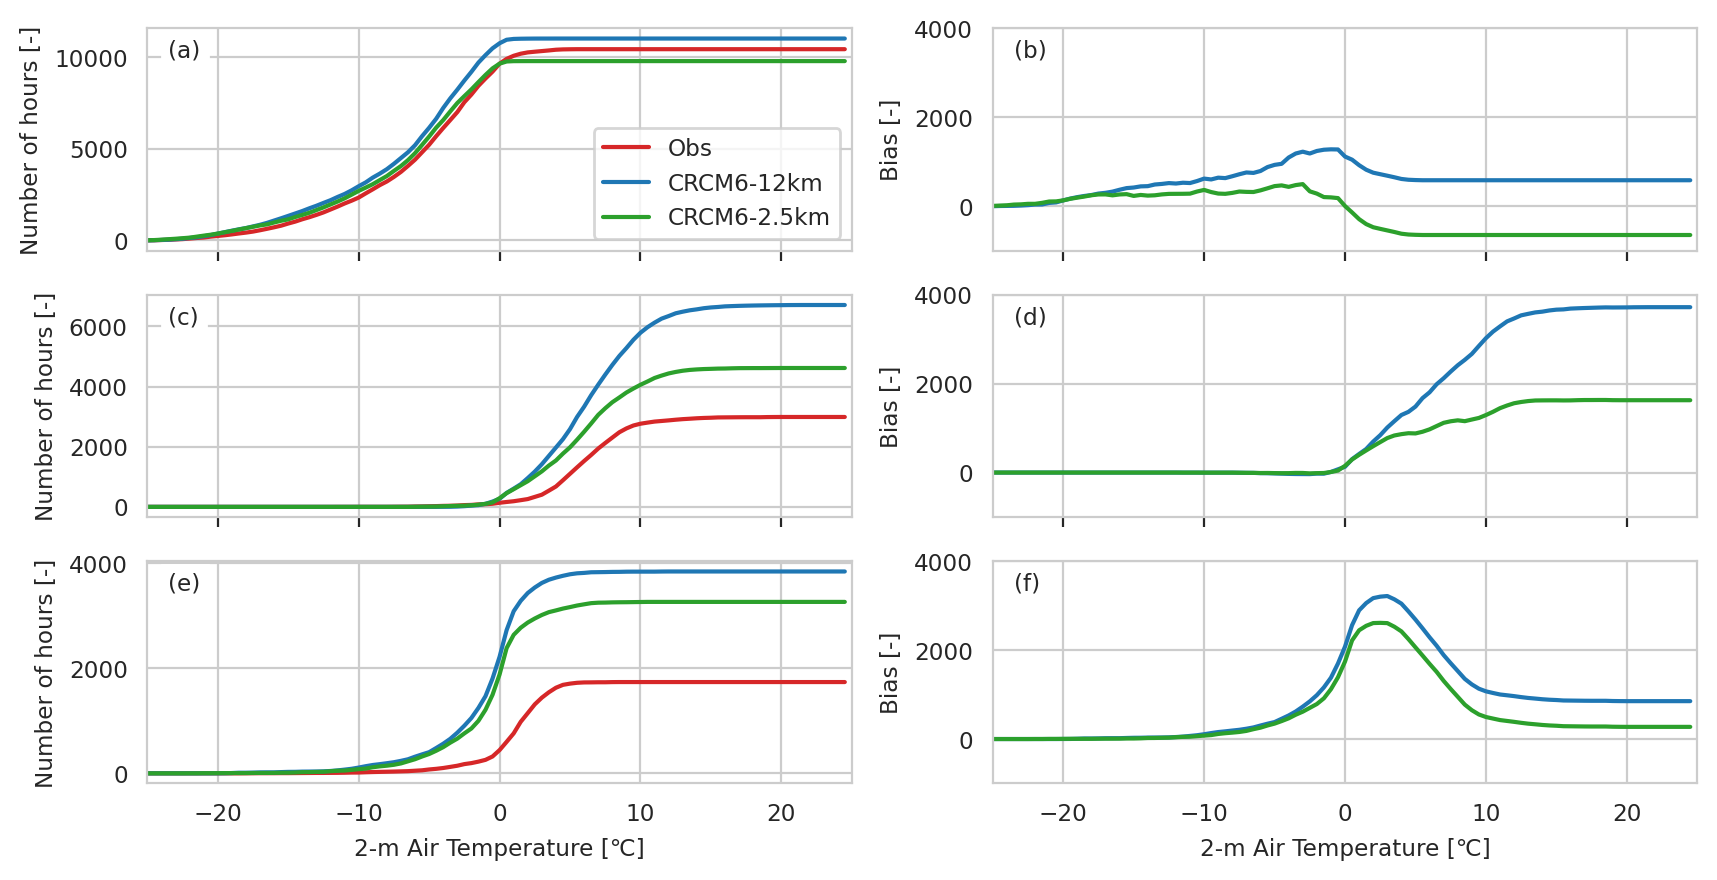

In [7]:
fig = plt.figure(facecolor='white', figsize=(10, 5), dpi=200)
spec = fig.add_gridspec(ncols=2, nrows=3)
#
ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[0, 1])
ax2 = fig.add_subplot(spec[1, 0])
ax3 = fig.add_subplot(spec[1, 1])
ax5 = fig.add_subplot(spec[2, 1])
ax4 = fig.add_subplot(spec[2, 0])
list_threshold = np.arange(-25,25.5,0.5)
for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
    ax.set_axisbelow(True)
    ax.grid(True)
    ax.xaxis.set_tick_params(labelsize='small')
    ax.yaxis.set_tick_params(labelsize='small')


ax0.plot(list_threshold[:-1],np.cumsum(list_fsolid_obs),c='tab:red',linewidth=1.5,label='Obs')
ax0.plot(list_threshold[:-1],np.cumsum(list_fsolid_11km),c='tab:blue',linewidth=1.5,label='CRCM6-12km')
ax0.plot(list_threshold[:-1],np.cumsum(list_fsolid_2p5km),c='tab:green',linewidth=1.5,label='CRCM6-2.5km')


ax2.plot(list_threshold[:-1],np.cumsum(np.array(list_fliquid_obs)+np.array(list_ffr_obs)),c='tab:red',linewidth=1.5)
ax2.plot(list_threshold[:-1],np.cumsum(np.array(list_fliquid_11km)+np.array(list_ffr_11km)),c='tab:blue',linewidth=1.5)
ax2.plot(list_threshold[:-1],np.cumsum(np.array(list_fliquid_2p5km)+np.array(list_ffr_2p5km)),c='tab:green',linewidth=1.5)

ax4.plot(list_threshold[:-1],np.cumsum(np.array(list_fmix_obs)+np.array(list_fmixfr_obs)),c='tab:red',linewidth=1.5)
ax4.plot(list_threshold[:-1],np.cumsum(np.array(list_fmix_11km)+np.array(list_fmixfr_11km)),c='tab:blue',linewidth=1.5)
ax4.plot(list_threshold[:-1],np.cumsum(np.array(list_fmix_2p5km)+np.array(list_fmixfr_2p5km)),c='tab:green',linewidth=1.5)


# ax1.plot(list_threshold[:-1],np.cumsum(list_fsolid_obs),c='tab:red',linewidth=1.5,label='Obs')
ax1.plot(list_threshold[:-1],np.cumsum(list_fsolid_11km)-np.cumsum(list_fsolid_obs),c='tab:blue',linewidth=1.5,label='CRCM6-12km')
ax1.plot(list_threshold[:-1],np.cumsum(list_fsolid_2p5km)-np.cumsum(list_fsolid_obs),c='tab:green',linewidth=1.5,label='CRCM6-2.5km')


# ax3.plot(list_threshold[:-1],np.cumsum(np.array(list_fliquid_obs)+np.array(list_ffr_obs)),c='tab:red',linewidth=1.5)
ax3.plot(list_threshold[:-1],np.cumsum(np.array(list_fliquid_11km)+np.array(list_ffr_11km))-np.cumsum(np.array(list_fliquid_obs)+np.array(list_ffr_obs)),c='tab:blue',linewidth=1.5)
ax3.plot(list_threshold[:-1],np.cumsum(np.array(list_fliquid_2p5km)+np.array(list_ffr_2p5km))-np.cumsum(np.array(list_fliquid_obs)+np.array(list_ffr_obs)),c='tab:green',linewidth=1.5)

# ax5.plot(list_threshold[:-1],np.cumsum(np.array(list_fmix_obs)+np.array(list_fmixfr_obs)),c='tab:red',linewidth=1.5)
ax5.plot(list_threshold[:-1],np.cumsum(np.array(list_fmix_11km)+np.array(list_fmixfr_11km))-np.cumsum(np.array(list_fliquid_obs)+np.array(list_ffr_obs)),c='tab:blue',linewidth=1.5)
ax5.plot(list_threshold[:-1],np.cumsum(np.array(list_fmix_2p5km)+np.array(list_fmixfr_2p5km))-np.cumsum(np.array(list_fliquid_obs)+np.array(list_ffr_obs)),c='tab:green',linewidth=1.5)


ax0.set_ylabel('Number of hours [-]',fontsize='small')
ax2.set_ylabel('Number of hours [-]',fontsize='small')
ax4.set_ylabel('Number of hours [-]',fontsize='small')

ax1.set_ylabel('Bias [-]',fontsize='small')
ax3.set_ylabel('Bias [-]',fontsize='small')
ax5.set_ylabel('Bias [-]',fontsize='small')

for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
    # ax.set_ylabel('Number of hours [-]')
    # ax.set_ylim([0,2000])
    ax.set_xlim([list_threshold[0],list_threshold[-1]])

for ax in [ax1,ax3,ax5]:
    ax.set_ylim(-1000,4000)
ax0.tick_params(which="both",bottom=True,labelbottom=False)
ax1.tick_params(which="both",bottom=True,labelbottom=False)
ax2.tick_params(which="both",bottom=True,labelbottom=False)
ax3.tick_params(which="both",bottom=True,labelbottom=False)
# ax3.tick_params(which="both",bottom=True,labelbottom=False)
ax4.set_xlabel('2-m Air Temperature [\u2103]',fontsize='small')
ax5.set_xlabel('2-m Air Temperature [\u2103]',fontsize='small')
ax0.annotate(f'(a)', xy=(0.03, 0.87), bbox=bbox, xycoords='axes fraction',fontsize='small')
ax1.annotate(f'(b)', xy=(0.03, 0.87), bbox=bbox, xycoords='axes fraction',fontsize='small')
ax2.annotate(f'(c)', xy=(0.03, 0.87), bbox=bbox, xycoords='axes fraction',fontsize='small')
ax3.annotate(f'(d)', xy=(0.03, 0.87), bbox=bbox, xycoords='axes fraction',fontsize='small')
ax4.annotate(f'(e)', xy=(0.03, 0.87), bbox=bbox, xycoords='axes fraction',fontsize='small')
ax5.annotate(f'(f)', xy=(0.03, 0.87), bbox=bbox, xycoords='axes fraction',fontsize='small')

# ax0.set_title('SOLID')
# ax2.set_title('LIQUID')
# ax4.set_title('MIX')
# ax3.set_title('MIXFR')
# ax4.set_title('FR')
ax0.legend(loc='lower right',fontsize='small')

image_savepath = fr"/upslope/chalifour/projet_maitrise/figure_final_submission/fig_distcumsum_prcp"
fig.savefig(image_savepath+".png", format='png', bbox_inches='tight')

plt.show()
plt.close(fig)

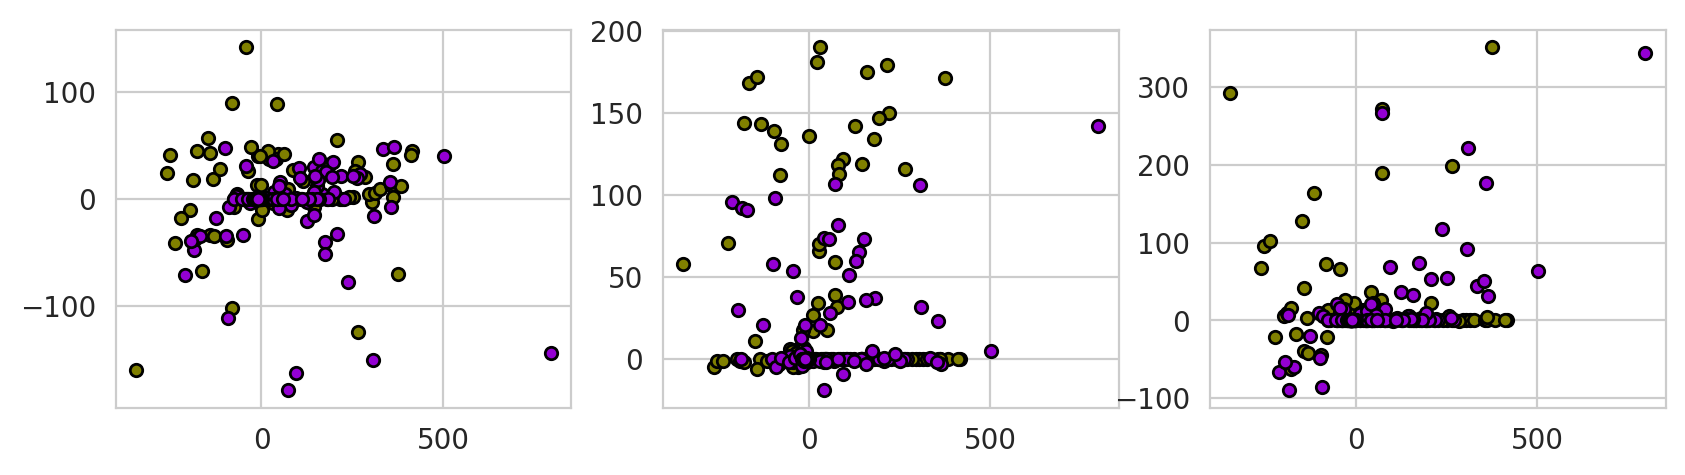

In [8]:
biais_sol_11km  = np.array(list_fsolid_11km)-np.array(list_fsolid_obs)
biais_mix_11km  = (np.array(list_fliquid_11km)+np.array(list_ffr_11km))-(np.array(list_fliquid_obs)+np.array(list_ffr_obs))
biais_liq_11km  = (np.array(list_fmix_11km)+np.array(list_fmixfr_11km))-(np.array(list_fmix_obs)+np.array(list_fmixfr_obs))

biais_sol_2p5  = np.array(list_fsolid_2p5km)-np.array(list_fsolid_obs)
biais_mix_2p5  = (np.array(list_fliquid_2p5km)+np.array(list_ffr_2p5km))-(np.array(list_fliquid_obs)+np.array(list_ffr_obs))
biais_liq_2p5  = (np.array(list_fmix_2p5km)+np.array(list_fmixfr_2p5km))-(np.array(list_fmix_obs)+np.array(list_fmixfr_obs))

biais_tt_11km = np.array(list_temp_11km)-np.array(list_temp_obs)
biais_tt_2p5km = np.array(list_temp_2p5km)-np.array(list_temp_obs)


fig = plt.figure(facecolor='white', figsize=(10, 2.5), dpi=200)
spec = fig.add_gridspec(ncols=3, nrows=1)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[0, 1])
ax2 = fig.add_subplot(spec[0, 2])

ax0.scatter(biais_tt_11km,biais_sol_11km,c='olive',ec='k',s=20)
ax1.scatter(biais_tt_11km,biais_mix_11km,c='olive',ec='k',s=20)
ax2.scatter(biais_tt_11km,biais_liq_11km,c='olive',ec='k',s=20)

ax0.scatter(biais_tt_2p5km,biais_sol_2p5,c='darkviolet',ec='k',s=20)
ax1.scatter(biais_tt_2p5km,biais_mix_2p5,c='darkviolet',ec='k',s=20)
ax2.scatter(biais_tt_2p5km,biais_liq_2p5,c='darkviolet',ec='k',s=20)

plt.show()


KeyError: 'TT'

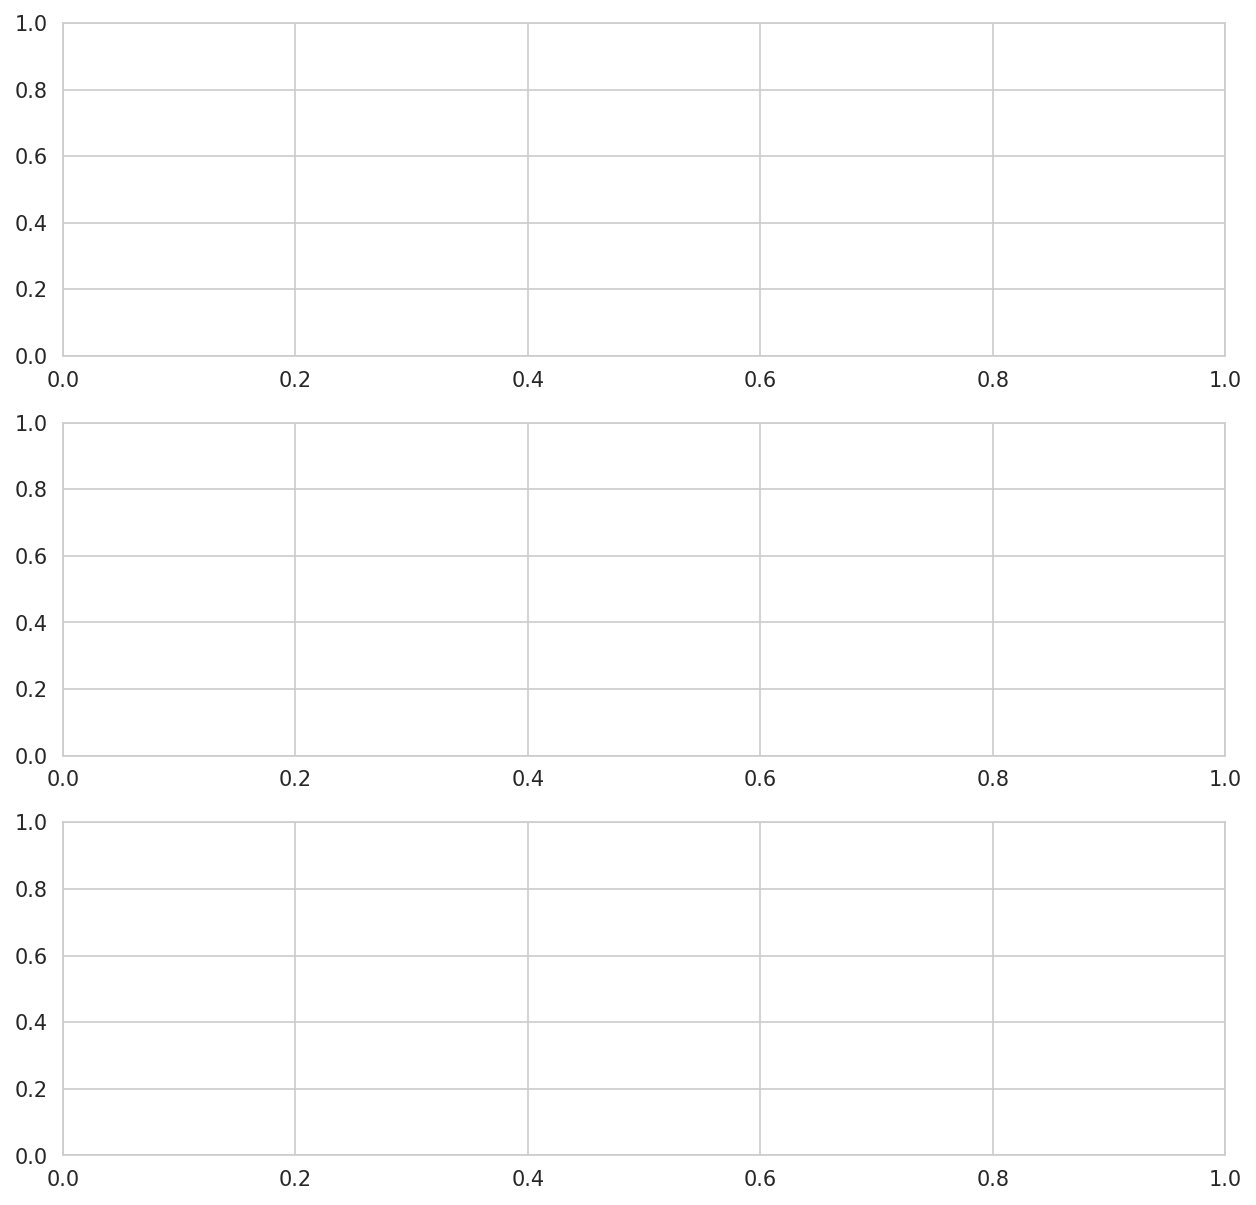

In [9]:
def wet_bulb_tw(t, rh):
    a = t * np.arctan(0.151977 * (rh + 8.313659) ** 0.5)
    b = np.arctan(t + rh) - np.arctan(rh - 1.676331)
    c = 0.00391838 * rh ** (1.5) * np.arctan(0.023101 * rh)
    d = -4.686035
    tw = a + b + c + d
    return tw


# Temperature du thermometre mouiller
width = 0.5
fig = plt.figure(facecolor='white', figsize=(10, 10), dpi=150)
spec = fig.add_gridspec(ncols=1, nrows=3)
#
ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])
ax2 = fig.add_subplot(spec[2, 0])
list_threshold = np.arange(-25, 25.5, 0.5)
list_fliquid_obs = []
list_fsolid_obs = []
list_fmix_obs = []

ymax = 900
wet_bulb_t = wet_bulb_tw(dataframe_1h['TT'],dataframe_1h['HR'])
for idx in range(len(list_threshold) - 1):

    df_t = dataframe_1h.loc[
        (wet_bulb_t >= list_threshold[idx]) & (wet_bulb_t <= list_threshold[idx + 1]), [
            'precip_inst_pluvio', 'f_solid', 'f_liquid']]
    df_mixte = dataframe_1h.loc[
        (wet_bulb_t >= list_threshold[idx]) & (wet_bulb_t <= list_threshold[idx + 1]) & (
                    dataframe_1h['f_solid'] > 0) & (dataframe_1h['f_liquid'] > 0), ['precip_inst_pluvio', 'f_solid',
                                                                                    'f_liquid']]
    list_fsolid_obs.append(
        np.sum((df_t['precip_inst_pluvio'] * df_t['f_solid']) / (df_t['precip_inst_pluvio'] * df_t['f_solid'])))
    list_fliquid_obs.append(
        np.sum((df_t['precip_inst_pluvio'] * df_t['f_liquid']) / (df_t['precip_inst_pluvio'] * df_t['f_liquid'])))
    list_fmix_obs.append(np.sum(df_mixte['precip_inst_pluvio'] / df_mixte['precip_inst_pluvio']))
    #
    # list_fsolid.append(np.sum((df_t['precip_inst_pluvio']*df_t['f_solid'])))
    # list_fliquid.append(np.sum((df_t['precip_inst_pluvio']*df_t['f_liquid'])))
    # list_fmix.append(np.sum(df_mixte['precip_inst_pluvio']))

array_f_solid = np.array(list_fsolid_obs)[(np.array(list_fliquid_obs) > 10) & (np.array(list_fsolid_obs) > 10)]
array_f_liquid = np.array(list_fliquid_obs)[(np.array(list_fliquid_obs) > 10) & (np.array(list_fsolid_obs) > 10)]
thresh = list_threshold[:-1][(np.array(list_fliquid_obs) > 10) & (np.array(list_fsolid_obs) > 10)]

idx_min = np.argmin((abs(array_f_solid - array_f_liquid)))
t_50_obs = thresh[idx_min]
print('T_50 Obs ', thresh[idx_min])

ax0.bar(list_threshold[:-1], list_fsolid_obs, facecolor='tab:blue', width=width, alpha=0.5)
ax0.bar(list_threshold[:-1], list_fliquid_obs, facecolor='tab:green', width=width, alpha=0.5)
ax0.bar(list_threshold[:-1], list_fmix_obs, facecolor='tab:orange', width=width, alpha=0.5)
ax0.plot(list_threshold[:-1], list_fsolid_obs, c='tab:blue', linewidth=2)
# ax0.fill_between(list_threshold[:-1],0,list_fsolid_obs, color='tab:blue',alpha=0.8)
ax0.plot(list_threshold[:-1], list_fliquid_obs, c='tab:green', linewidth=2)
# ax0.fill_between(list_threshold[:-1],0,list_fliquid_obs, color='tab:green',alpha=0.8)
ax0.plot(list_threshold[:-1], list_fmix_obs, c='tab:orange', linewidth=2)
# ax0.fill_between(list_threshold[:-1],0,list_fmix_obs, color='tab:orange',alpha=0.8)
vline_t50 = ax0.vlines(thresh[idx_min], ymin=0, ymax=ymax, colors='k', linewidth=1, zorder=999)

bbox = dict(boxstyle="square", fc="w", ec='k', lw=0.5)
ax0.annotate('T$_{50}$' + f' = {thresh[idx_min]:.1f} \u2103 ', xy=(thresh[idx_min] + 2, 700), bbox=bbox, fontsize=8)

handle = [Patch(facecolor='tab:blue', edgecolor="tab:blue", alpha=0.8),
          Patch(facecolor='tab:green', edgecolor="tab:green", alpha=0.8),
          Patch(facecolor='tab:orange', edgecolor="tab:orange", alpha=0.8), vline_t50]
label = ['Solid', 'Liquid', 'Mix', 'T$_{50}$']

ax0.legend(handles=handle, labels=label, ncol=1, fontsize=8)

list_fliquid_11km = []
list_fsolid_11km = []
list_fmix_11km = []
for idx in range(len(list_threshold) - 1):
    df_t = dataframe_11kmP3_tot.loc[
        (dataframe_11kmP3_tot['TT'] >= list_threshold[idx]) & (dataframe_11kmP3_tot['TT'] <= list_threshold[idx + 1]), [
            'PR', 'f_solid', 'f_liquid']]
    df_mixte = dataframe_11kmP3_tot.loc[(dataframe_11kmP3_tot['TT'] >= list_threshold[idx]) & (
                dataframe_11kmP3_tot['TT'] <= list_threshold[idx + 1]) & (dataframe_11kmP3_tot['f_solid'] > 0) & (
                                                    dataframe_11kmP3_tot['f_liquid'] > 0), ['PR', 'f_solid',
                                                                                            'f_liquid']]
    list_fsolid_11km.append(np.sum((df_t['PR'] * df_t['f_solid']) / (df_t['PR'] * df_t['f_solid'])))
    list_fliquid_11km.append(np.sum((df_t['PR'] * df_t['f_liquid']) / (df_t['PR'] * df_t['f_liquid'])))
    list_fmix_11km.append(np.sum(df_mixte['PR'] / df_mixte['PR']))
    #
    # list_fsolid.append(np.sum((df_t['PR']*df_t['f_solid'])))
    # list_fliquid.append(np.sum((df_t['PR']*df_t['f_liquid'])))
    # list_fmix.append(np.sum(df_mixte['PR']))

array_f_solid = np.array(list_fsolid_11km)[(np.array(list_fliquid_11km) > 10) & (np.array(list_fsolid_11km) > 10)]
array_f_liquid = np.array(list_fliquid_11km)[(np.array(list_fliquid_11km) > 10) & (np.array(list_fsolid_11km) > 10)]
thresh = list_threshold[:-1][(np.array(list_fliquid_11km) > 10) & (np.array(list_fsolid_11km) > 10)]

idx_min = np.argmin((abs(array_f_solid - array_f_liquid)))
t_50_11km = thresh[idx_min]
print('T_50 12 km ', thresh[idx_min])
ax1.bar(list_threshold[:-1], list_fsolid_11km, facecolor='tab:blue', width=width, alpha=0.5)
ax1.bar(list_threshold[:-1], list_fliquid_11km, facecolor='tab:green', width=width, alpha=0.5)
ax1.bar(list_threshold[:-1], list_fmix_11km, facecolor='tab:orange', width=width, alpha=0.5)
# ax1.bar(list_threshold[:-1]+1/2*width,list_fmix,facecolor='tab:orange',width=width)
ax1.plot(list_threshold[:-1], list_fsolid_11km, c='tab:blue', linewidth=2)
# ax1.fill_between(list_threshold[:-1],0,list_fsolid_11km, color='tab:blue',alpha=0.8)
ax1.plot(list_threshold[:-1], list_fliquid_11km, c='tab:green', linewidth=2)
# ax1.fill_between(list_threshold[:-1],0,list_fliquid_11km, color='tab:green',alpha=0.8)
ax1.plot(list_threshold[:-1], list_fmix_11km, c='tab:orange', linewidth=2)
# ax1.fill_between(list_threshold[:-1],0,list_fmix_11km, color='tab:orange',alpha=0.8)
ax1.vlines(thresh[idx_min], ymin=0, ymax=ymax, colors='k', linewidth=1, zorder=999)
ax1.annotate('T$_{50}$' + f' = {thresh[idx_min]:.1f} \u2103 ', xy=(thresh[idx_min] + 2, 700), bbox=bbox, fontsize=8)

list_fliquid_2p5km = []
list_fsolid_2p5km = []
list_fmix_2p5km = []
t_50 = 0
for idx in range(len(list_threshold) - 1):
    df_t = dataframe_2p5kmP3_tot.loc[(dataframe_2p5kmP3_tot['TT'] >= list_threshold[idx]) & (
                dataframe_2p5kmP3_tot['TT'] <= list_threshold[idx + 1]), ['PR', 'f_solid', 'f_liquid']]
    df_mixte = dataframe_2p5kmP3_tot.loc[(dataframe_2p5kmP3_tot['TT'] >= list_threshold[idx]) & (
                dataframe_2p5kmP3_tot['TT'] <= list_threshold[idx + 1]) & (dataframe_2p5kmP3_tot['f_solid'] > 0) & (
                                                     dataframe_2p5kmP3_tot['f_liquid'] > 0), ['PR', 'f_solid',
                                                                                              'f_liquid']]

    list_fsolid_2p5km.append(np.sum((df_t['PR'] * df_t['f_solid']) / (df_t['PR'] * df_t['f_solid'])))
    list_fliquid_2p5km.append(np.sum((df_t['PR'] * df_t['f_liquid']) / (df_t['PR'] * df_t['f_liquid'])))
    list_fmix_2p5km.append(np.sum(df_mixte['PR'] / df_mixte['PR']))
    #
    # list_fsolid.append(np.sum((df_t['PR']*df_t['f_solid'])))
    # list_fliquid.append(np.sum((df_t['PR']*df_t['f_liquid'])))
    # list_fmix.append(np.sum(df_mixte['PR']))
# [(np.array(list_fliquid)>0) & (np.array(list_fsolid)>0)]
array_f_solid = np.array(list_fsolid_2p5km)[(np.array(list_fliquid_2p5km) > 10) & (np.array(list_fsolid_2p5km) > 10)]
array_f_liquid = np.array(list_fliquid_2p5km)[(np.array(list_fliquid_2p5km) > 10) & (np.array(list_fsolid_2p5km) > 10)]
thresh = list_threshold[:-1][(np.array(list_fliquid_2p5km) > 10) & (np.array(list_fsolid_2p5km) > 10)]

idx_min = np.argmin((abs(array_f_solid - array_f_liquid)))
t_50_2p5km = thresh[idx_min]
print('T_50 2.5 km ', thresh[idx_min])
ax2.bar(list_threshold[:-1], list_fsolid_2p5km, facecolor='tab:blue', width=width, alpha=0.5)
ax2.bar(list_threshold[:-1], list_fliquid_2p5km, facecolor='tab:green', width=width, alpha=0.5)
ax2.bar(list_threshold[:-1], list_fmix_2p5km, facecolor='tab:orange', width=width, alpha=0.5)
# ax2.bar(list_threshold[:-1],list_fsolid,facecolor='tab:blue',width=width)
# ax2.bar(list_threshold[:-1],list_fliquid,facecolor='tab:green',width=width,bottom=list_fsolid)
array_f_solid = np.array(list_fsolid_2p5km)
array_f_liquid = np.array(list_fliquid_2p5km)
# ax2.plot(list_threshold[:-1],(1-(abs(array_f_solid-array_f_liquid)/np.max(abs(array_f_solid-array_f_liquid))))*100,c='k',linewidth=2)
ax2.plot(list_threshold[:-1], list_fsolid_2p5km, c='tab:blue', linewidth=2)
# ax2.fill_between(list_threshold[:-1],0,list_fsolid_2p5km, color='tab:blue',alpha=0.8)
ax2.plot(list_threshold[:-1], list_fliquid_2p5km, c='tab:green', linewidth=2)
# ax2.fill_between(list_threshold[:-1],0,list_fliquid_2p5km, color='tab:green',alpha=0.8)
ax2.plot(list_threshold[:-1], list_fmix_2p5km, c='tab:orange', linewidth=2)
# ax2.fill_between(list_threshold[:-1],0,list_fmix_2p5km, color='tab:orange',alpha=0.8)

ax2.vlines(thresh[idx_min], ymin=0, ymax=ymax, colors='k', linewidth=1, zorder=999)

ax2.annotate('T$_{50}$' + f' = {thresh[idx_min]:.1f} \u2103 ', xy=(thresh[idx_min] + 2, 700), bbox=bbox, fontsize=8)

for ax in [ax0, ax1, ax2]:
    ax.set_ylabel('Nb event [-]')
    ax.set_ylim([0, ymax])
    ax.set_xlim([list_threshold[0], list_threshold[-1]])
ax0.tick_params(which="both", bottom=True, labelbottom=False)
ax1.tick_params(which="both", bottom=True, labelbottom=False)
ax2.set_xlabel('Wet Bulb temperature [\u2103]')

ax0.annotate(f'(a) Observation', xy=(0.01, 0.9), bbox=bbox, xycoords='axes fraction')
ax1.annotate(f'(b) 12 km', xy=(0.01, 0.9), bbox=bbox, xycoords='axes fraction')
ax2.annotate(f'(c) 2.5 km', xy=(0.01, 0.9), bbox=bbox, xycoords='axes fraction')

plt.show()
plt.close(fig)